In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten 
from tensorflow.keras.models import Model
import numpy as np
from glob import glob

Init Plugin
Init Graph Optimizer
Init Kernel


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
IMAGE_SIZE=[224,224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Metal device set to: Apple M1


2021-07-11 17:53:25.393375: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-07-11 17:53:25.393910: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob('Dataset/train/*')

In [6]:
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [11]:
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1512 images belonging to 5 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 500 images belonging to 5 classes.


In [13]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/Users/shrutibansal/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-07-11 17:53:49.215100: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-11 17:53:49.216325: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2021-07-11 17:53:50.198271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - ETA: 0s - loss: 3.5633 - accuracy: 0.6607

2021-07-11 17:54:10.550009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


95/95 [==============================] - 27s 251ms/step - loss: 3.5633 - accuracy: 0.6607 - val_loss: 4.3405 - val_accuracy: 0.6540
Epoch 2/20
95/95 [==============================] - 23s 242ms/step - loss: 1.9609 - accuracy: 0.8142 - val_loss: 2.0778 - val_accuracy: 0.7800
Epoch 3/20
95/95 [==============================] - 23s 241ms/step - loss: 1.7578 - accuracy: 0.8426 - val_loss: 2.8745 - val_accuracy: 0.8000
Epoch 4/20
95/95 [==============================] - 23s 241ms/step - loss: 1.1263 - accuracy: 0.8929 - val_loss: 2.5235 - val_accuracy: 0.8120
Epoch 5/20
95/95 [==============================] - 23s 241ms/step - loss: 0.8549 - accuracy: 0.9167 - val_loss: 3.4777 - val_accuracy: 0.7780
Epoch 6/20
95/95 [==============================] - 23s 242ms/step - loss: 0.8421 - accuracy: 0.9206 - val_loss: 2.9738 - val_accuracy: 0.8320
Epoch 7/20
95/95 [==============================] - 23s 242ms/step - loss: 0.8014 - accuracy: 0.9312 - val_loss: 3.3964 - val_accuracy: 0.7980
Epoch 8/20

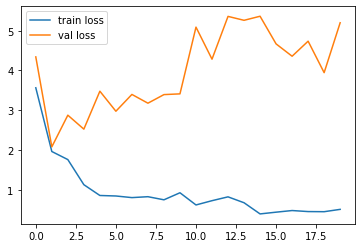

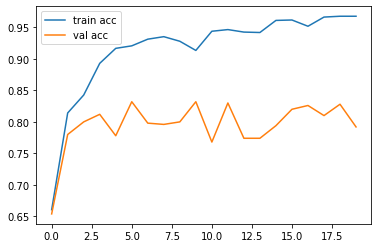

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
from tensorflow.keras.models import load_model

model.save('bin.h5')

In [17]:
y_pred = model.predict(test_set)

2021-07-11 18:03:55.537009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [18]:
y_pred

array([[6.54232830e-23, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [1.06583716e-21, 3.60812003e-22, 1.00000000e+00, 0.00000000e+00,
        4.46661691e-15],
       [2.32822189e-26, 1.10563819e-16, 1.63507137e-17, 7.34084448e-29,
        1.00000000e+00],
       ...,
       [1.13450566e-35, 1.90694847e-25, 4.17652529e-07, 0.00000000e+00,
        9.99999523e-01],
       [5.67273767e-32, 9.99909759e-01, 4.02998226e-20, 1.15522036e-37,
        9.02136235e-05],
       [9.99906659e-01, 0.00000000e+00, 4.73440049e-25, 9.33159172e-05,
        2.82418202e-16]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([3, 2, 4, 2, 3, 0, 2, 2, 4, 2, 2, 0, 0, 3, 2, 0, 2, 4, 2, 0, 2, 0,
       1, 0, 2, 4, 0, 2, 2, 3, 1, 2, 0, 1, 2, 0, 2, 0, 4, 0, 4, 3, 2, 4,
       2, 1, 4, 0, 0, 3, 3, 4, 0, 2, 1, 4, 3, 2, 4, 1, 2, 4, 4, 2, 0, 4,
       2, 0, 4, 2, 4, 3, 0, 0, 0, 2, 2, 0, 0, 2, 4, 3, 4, 0, 2, 2, 1, 2,
       0, 3, 0, 3, 4, 1, 3, 4, 4, 0, 0, 4, 4, 0, 0, 4, 2, 4, 3, 3, 1, 3,
       2, 1, 4, 0, 1, 3, 2, 2, 1, 1, 1, 1, 2, 0, 3, 0, 0, 2, 2, 4, 0, 4,
       4, 0, 4, 2, 2, 0, 4, 2, 4, 0, 2, 0, 0, 3, 2, 0, 2, 3, 2, 2, 4, 3,
       1, 4, 2, 4, 2, 4, 4, 4, 3, 2, 3, 2, 3, 0, 4, 2, 3, 2, 4, 1, 2, 2,
       3, 3, 0, 0, 3, 4, 2, 0, 2, 1, 3, 0, 4, 4, 2, 1, 2, 4, 4, 3, 0, 0,
       3, 3, 4, 0, 4, 4, 2, 0, 0, 1, 0, 4, 4, 4, 1, 2, 4, 4, 2, 4, 4, 3,
       4, 4, 4, 4, 3, 2, 0, 0, 4, 0, 1, 2, 1, 0, 1, 4, 3, 1, 4, 1, 0, 0,
       2, 4, 0, 1, 2, 1, 3, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 1, 2,
       4, 0, 3, 2, 2, 1, 2, 2, 0, 4, 1, 0, 2, 2, 3, 1, 2, 0, 2, 2, 1, 1,
       3, 2, 4, 0, 0, 4, 1, 2, 2, 4, 2, 3, 3, 4, 0,

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('bin.h5')

In [39]:
img=image.load_img('Dataset/Test/cardboard/cardboard15.jpg',target_size=(224,224))

In [40]:
x=image.img_to_array(img)
x

array([[[197., 161., 125.],
        [202., 167., 129.],
        [196., 158., 121.],
        ...,
        [136., 100.,  64.],
        [135.,  99.,  63.],
        [130.,  94.,  58.]],

       [[198., 162., 126.],
        [199., 164., 126.],
        [198., 160., 123.],
        ...,
        [134.,  98.,  62.],
        [133.,  97.,  61.],
        [128.,  92.,  56.]],

       [[197., 161., 125.],
        [192., 157., 119.],
        [200., 162., 125.],
        ...,
        [134.,  98.,  62.],
        [138., 102.,  66.],
        [138., 102.,  66.]],

       ...,

       [[180., 144., 108.],
        [186., 150., 114.],
        [186., 150., 114.],
        ...,
        [136., 103.,  70.],
        [134., 101.,  68.],
        [133., 100.,  67.]],

       [[189., 153., 117.],
        [190., 154., 118.],
        [187., 151., 115.],
        ...,
        [137., 104.,  71.],
        [137., 104.,  71.],
        [137., 104.,  71.]],

       [[202., 166., 130.],
        [194., 158., 122.],
        [186., 1

In [41]:
x.shape

(224, 224, 3)

In [42]:
x=x/255

In [43]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
model.predict(img_data)

array([[9.3695295e-01, 1.1633197e-08, 6.0871873e-02, 8.3460589e-05,
        2.0918066e-03]], dtype=float32)

In [45]:

a=np.argmax(model.predict(img_data), axis=1)

In [47]:
a==0

array([ True])